<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                7719 non-null   int64 
 1   Area                 7719 non-null   int64 
 2   Location             7719 non-null   object
 3   No. of Bedrooms      7719 non-null   int64 
 4   Resale               7719 non-null   int64 
 5   MaintenanceStaff     7719 non-null   int64 
 6   Gymnasium            7719 non-null   int64 
 7   SwimmingPool         7719 non-null   int64 
 8   LandscapedGardens    7719 non-null   int64 
 9   JoggingTrack         7719 non-null   int64 
 10  RainWaterHarvesting  7719 non-null   int64 
 11  IndoorGames          7719 non-null   int64 
 12  ShoppingMall         7719 non-null   int64 
 13  Intercom             7719 non-null   int64 
 14  SportsFacility       7719 non-null   int64 
 15  ATM                  7719 non-null   int64 
 16  ClubHo

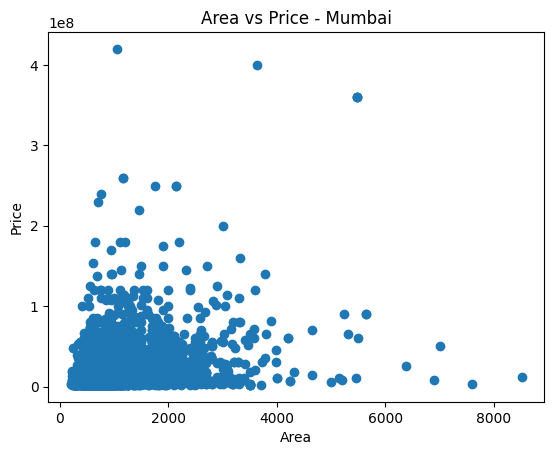

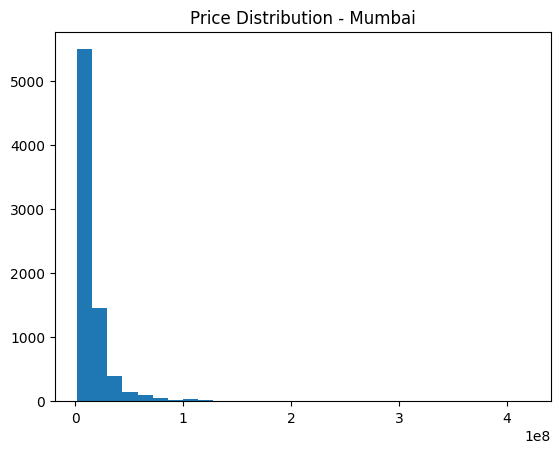

Simple LR R2: 0.07350597833814321
Multiple LR R2: 0.2010687530830363
PCA LR R2: -350.2228261564549
Lasso Best R2: -63.51420068552299
Ridge Best R2: -1.794234271354903
SVR Best R2: -0.0789991309028121
Decision Tree Best R2: 0.15928205331886766
Random Forest Best R2: 0.1793535017047681


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


df = pd.read_csv("Mumbai.csv")
df.head()

df.info()
df.describe()
df.isnull().sum()

plt.scatter(df['Area'], df['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price - Mumbai")
plt.show()

plt.hist(df['Price'], bins=30)
plt.title("Price Distribution - Mumbai")
plt.show()

X = df[['Area']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Simple LR R2:", r2_score(y_test, y_pred_lr))

df2 = pd.get_dummies(df, drop_first=True)

X = df2.drop('Price', axis=1)
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

print("Multiple LR R2:", r2_score(y_test, y_pred_mlr))

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train, y_train)
y_pred_pca = lr_pca.predict(X_test)

print("PCA LR R2:", r2_score(y_test, y_pred_pca))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=50000)
params = {'alpha': [0.1, 0.5, 1, 5, 10]}

grid_lasso = GridSearchCV(lasso, params, cv=5)
grid_lasso.fit(X_train_scaled, y_train)

ridge = Ridge(max_iter=50000)
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train_scaled, y_train)

print("Lasso Best R2:", grid_lasso.best_score_)
print("Ridge Best R2:", grid_ridge.best_score_)

svr = SVR()
rand_svr = RandomizedSearchCV(
    svr,
    {'C': [1, 5, 10, 50], 'epsilon': [0.01, 0.1, 1]},
    cv=5,
    n_iter=2
)
rand_svr.fit(X_train_scaled, y_train)

print("SVR Best R2:", rand_svr.best_score_)

dt = DecisionTreeRegressor()
grid_dt = GridSearchCV(dt, {'max_depth': [3, 5, 7, 10]}, cv=5)
grid_dt.fit(X_train, y_train)

print("Decision Tree Best R2:", grid_dt.best_score_)

rf = RandomForestRegressor()
rand_rf = RandomizedSearchCV(
    rf,
    {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]},
    cv=5,
    n_iter=2
)
rand_rf.fit(X_train, y_train)

print("Random Forest Best R2:", rand_rf.best_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

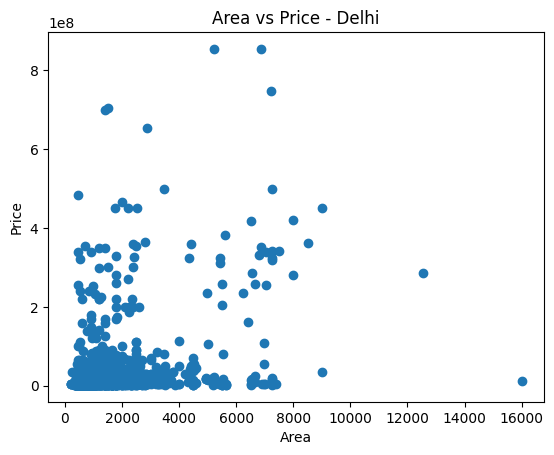

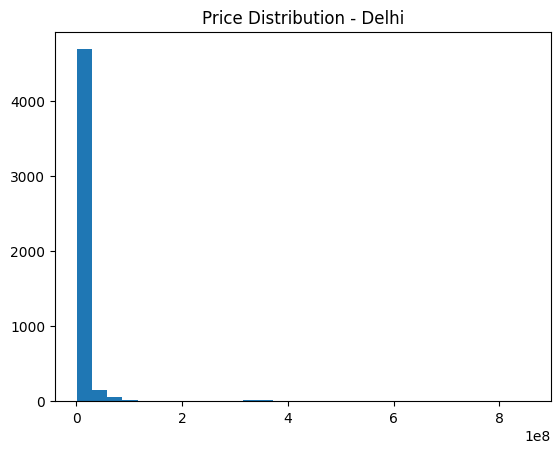

Simple LR R2: 0.06844875132775097
Multiple LR R2: 0.014183700579416092
PCA LR R2: -322551.48780283885
Lasso Best R2: -109.04885832761128
Ridge Best R2: -8.407014564407941
SVR Best R2: -0.05507323414790184
Decision Tree Best R2: -0.27397390651804204
Random Forest Best R2: 0.035024423634800204


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

df = pd.read_csv("Delhi.csv")
df.head()

df.info()
df.describe()
df.isnull().sum()

plt.scatter(df['Area'], df['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price - Delhi")
plt.show()

plt.hist(df['Price'], bins=30)
plt.title("Price Distribution - Delhi")
plt.show()

X = df[['Area']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Simple LR R2:", r2_score(y_test, y_pred_lr))

df2 = pd.get_dummies(df, drop_first=True)

X = df2.drop('Price', axis=1)
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

print("Multiple LR R2:", r2_score(y_test, y_pred_mlr))

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train, y_train)
y_pred_pca = lr_pca.predict(X_test)

print("PCA LR R2:", r2_score(y_test, y_pred_pca))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=50000)
params = {'alpha': [0.1, 0.5, 1, 5, 10]}

grid_lasso = GridSearchCV(lasso, params, cv=5)
grid_lasso.fit(X_train_scaled, y_train)

ridge = Ridge(max_iter=50000)
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train_scaled, y_train)

print("Lasso Best R2:", grid_lasso.best_score_)
print("Ridge Best R2:", grid_ridge.best_score_)

svr = SVR()
rand_svr = RandomizedSearchCV(
    svr,
    {'C': [1, 5, 10, 50], 'epsilon': [0.01, 0.1, 1]},
    cv=5,
    n_iter=2
)
rand_svr.fit(X_train_scaled, y_train)

print("SVR Best R2:", rand_svr.best_score_)

dt = DecisionTreeRegressor()
grid_dt = GridSearchCV(dt, {'max_depth': [3, 5, 7, 10]}, cv=5)
grid_dt.fit(X_train, y_train)

print("Decision Tree Best R2:", grid_dt.best_score_)

rf = RandomForestRegressor()
rand_rf = RandomizedSearchCV(
    rf,
    {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]},
    cv=5,
    n_iter=2
)
rand_rf.fit(X_train, y_train)

print("Random Forest Best R2:", rand_rf.best_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6507 entries, 0 to 6506
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6507 non-null   int64 
 1   Area                 6507 non-null   int64 
 2   Location             6507 non-null   object
 3   No. of Bedrooms      6507 non-null   int64 
 4   Resale               6507 non-null   int64 
 5   MaintenanceStaff     6507 non-null   int64 
 6   Gymnasium            6507 non-null   int64 
 7   SwimmingPool         6507 non-null   int64 
 8   LandscapedGardens    6507 non-null   int64 
 9   JoggingTrack         6507 non-null   int64 
 10  RainWaterHarvesting  6507 non-null   int64 
 11  IndoorGames          6507 non-null   int64 
 12  ShoppingMall         6507 non-null   int64 
 13  Intercom             6507 non-null   int64 
 14  SportsFacility       6507 non-null   int64 
 15  ATM                  6507 non-null   int64 
 16  ClubHo

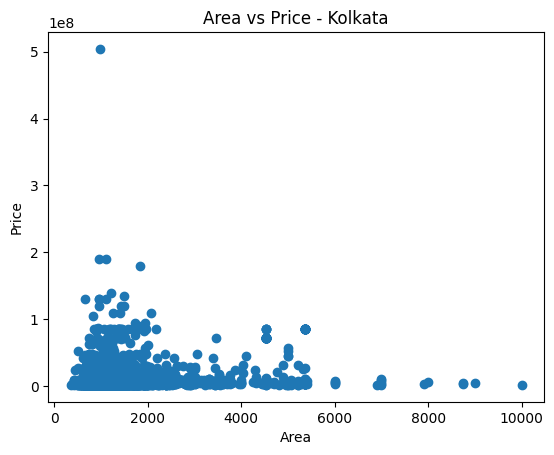

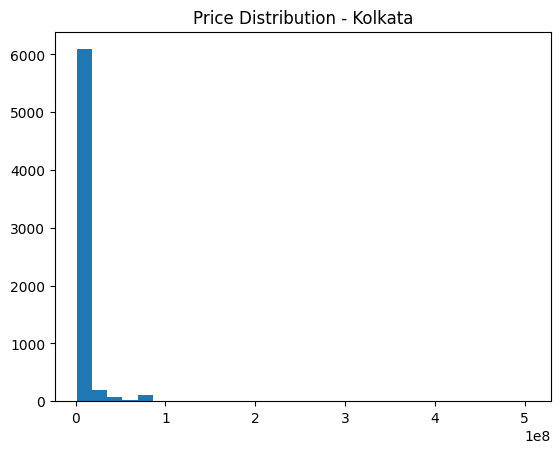

Simple LR R2: 0.06620104096610124
Multiple LR R2: 0.06550295239829929
PCA LR R2: -3157.3672052265238
Lasso Best R2: -84.63132582601125
Ridge Best R2: -2.0356240208228855
SVR Best R2: -0.06337744142790877
Decision Tree Best R2: 0.11766517632984086
Random Forest Best R2: 0.06367050739458233


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

df = pd.read_csv("Kolkata.csv")
df.head()

df.info()
df.describe()
df.isnull().sum()

plt.scatter(df['Area'], df['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price - Kolkata")
plt.show()

plt.hist(df['Price'], bins=30)
plt.title("Price Distribution - Kolkata")
plt.show()

X = df[['Area']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Simple LR R2:", r2_score(y_test, y_pred_lr))

df2 = pd.get_dummies(df, drop_first=True)

X = df2.drop('Price', axis=1)
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

print("Multiple LR R2:", r2_score(y_test, y_pred_mlr))

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train, y_train)
y_pred_pca = lr_pca.predict(X_test)

print("PCA LR R2:", r2_score(y_test, y_pred_pca))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=50000)
params = {'alpha': [0.1, 0.5, 1, 5, 10]}

grid_lasso = GridSearchCV(lasso, params, cv=5)
grid_lasso.fit(X_train_scaled, y_train)

ridge = Ridge(max_iter=50000)
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train_scaled, y_train)

print("Lasso Best R2:", grid_lasso.best_score_)
print("Ridge Best R2:", grid_ridge.best_score_)

svr = SVR()
rand_svr = RandomizedSearchCV(
    svr,
    {'C': [1, 5, 10, 50], 'epsilon': [0.01, 0.1, 1]},
    cv=5,
    n_iter=2
)
rand_svr.fit(X_train_scaled, y_train)

print("SVR Best R2:", rand_svr.best_score_)

dt = DecisionTreeRegressor()
grid_dt = GridSearchCV(dt, {'max_depth': [3, 5, 7, 10]}, cv=5)
grid_dt.fit(X_train, y_train)

print("Decision Tree Best R2:", grid_dt.best_score_)

rf = RandomForestRegressor()
rand_rf = RandomizedSearchCV(
    rf,
    {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]},
    cv=5,
    n_iter=2
)
rand_rf.fit(X_train, y_train)

print("Random Forest Best R2:", rand_rf.best_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                5014 non-null   int64 
 1   Area                 5014 non-null   int64 
 2   Location             5014 non-null   object
 3   No. of Bedrooms      5014 non-null   int64 
 4   Resale               5014 non-null   int64 
 5   MaintenanceStaff     5014 non-null   int64 
 6   Gymnasium            5014 non-null   int64 
 7   SwimmingPool         5014 non-null   int64 
 8   LandscapedGardens    5014 non-null   int64 
 9   JoggingTrack         5014 non-null   int64 
 10  RainWaterHarvesting  5014 non-null   int64 
 11  IndoorGames          5014 non-null   int64 
 12  ShoppingMall         5014 non-null   int64 
 13  Intercom             5014 non-null   int64 
 14  SportsFacility       5014 non-null   int64 
 15  ATM                  5014 non-null   int64 
 16  ClubHo

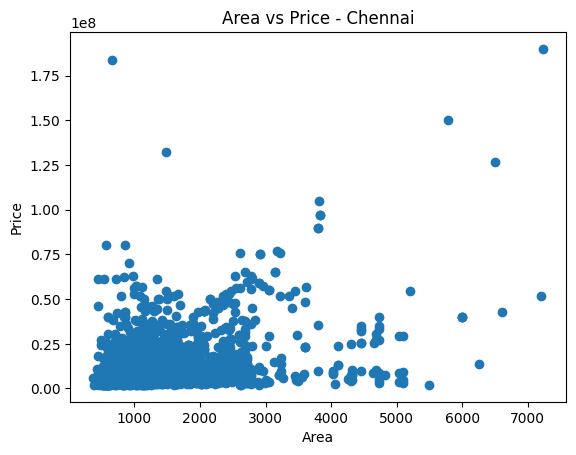

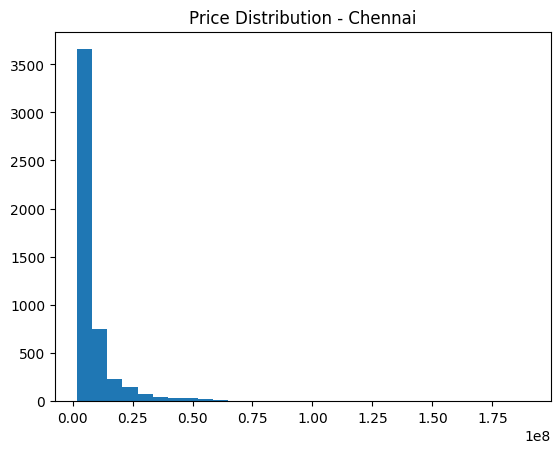

Simple LR R2: 0.16375846989363652
Multiple LR R2: 0.2635956363909172
PCA LR R2: -230.0317423823414
Lasso Best R2: -1427.4552587899168
Ridge Best R2: -2.13569326436849
SVR Best R2: -0.08470475324259615
Decision Tree Best R2: 0.25482003384317226
Random Forest Best R2: 0.3722382444399754


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

df = pd.read_csv("Chennai.csv")
df.head()

df.info()
df.describe()
df.isnull().sum()

plt.scatter(df['Area'], df['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price - Chennai")
plt.show()

plt.hist(df['Price'], bins=30)
plt.title("Price Distribution - Chennai")
plt.show()

X = df[['Area']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Simple LR R2:", r2_score(y_test, y_pred_lr))

df2 = pd.get_dummies(df, drop_first=True)

X = df2.drop('Price', axis=1)
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

print("Multiple LR R2:", r2_score(y_test, y_pred_mlr))

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train, y_train)
y_pred_pca = lr_pca.predict(X_test)

print("PCA LR R2:", r2_score(y_test, y_pred_pca))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=50000)
params = {'alpha': [0.1, 0.5, 1, 5, 10]}

grid_lasso = GridSearchCV(lasso, params, cv=5)
grid_lasso.fit(X_train_scaled, y_train)

ridge = Ridge(max_iter=50000)
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train_scaled, y_train)

print("Lasso Best R2:", grid_lasso.best_score_)
print("Ridge Best R2:", grid_ridge.best_score_)

svr = SVR()
rand_svr = RandomizedSearchCV(
    svr,
    {'C': [1, 5, 10, 50], 'epsilon': [0.01, 0.1, 1]},
    cv=5,
    n_iter=2
)
rand_svr.fit(X_train_scaled, y_train)

print("SVR Best R2:", rand_svr.best_score_)

dt = DecisionTreeRegressor()
grid_dt = GridSearchCV(dt, {'max_depth': [3, 5, 7, 10]}, cv=5)
grid_dt.fit(X_train, y_train)

print("Decision Tree Best R2:", grid_dt.best_score_)

rf = RandomForestRegressor()
rand_rf = RandomizedSearchCV(
    rf,
    {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]},
    cv=5,
    n_iter=2
)
rand_rf.fit(X_train, y_train)

print("Random Forest Best R2:", rand_rf.best_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

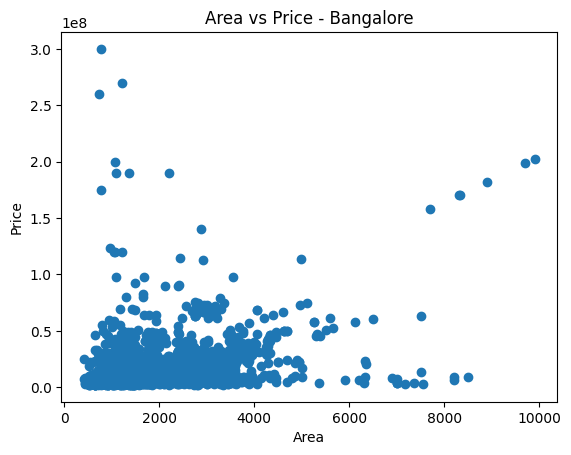

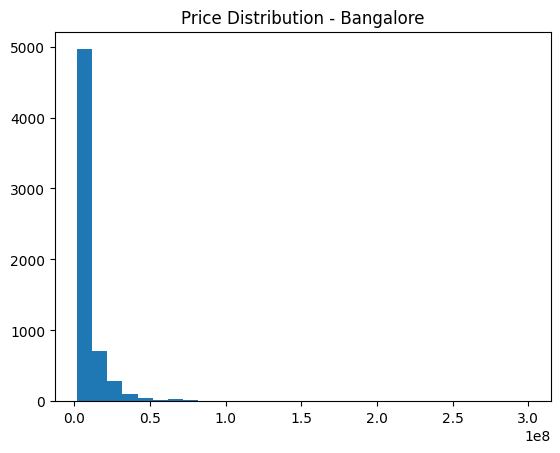

Simple LR R2: 0.1283845921331218
Multiple LR R2: 0.181024155884417
PCA LR R2: -1.863395751045631e+16
Lasso Best R2: -601.4279330074054
Ridge Best R2: -3.0779073895517803
SVR Best R2: -0.05672306767926756
Decision Tree Best R2: 0.14112714174452295
Random Forest Best R2: 0.20443060482270842


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

df = pd.read_csv("Bangalore.csv")
df.head()

df.info()
df.describe()
df.isnull().sum()

plt.scatter(df['Area'], df['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price - Bangalore")
plt.show()

plt.hist(df['Price'], bins=30)
plt.title("Price Distribution - Bangalore")
plt.show()

X = df[['Area']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Simple LR R2:", r2_score(y_test, y_pred_lr))

df2 = pd.get_dummies(df, drop_first=True)

X = df2.drop('Price', axis=1)
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

print("Multiple LR R2:", r2_score(y_test, y_pred_mlr))

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train, y_train)
y_pred_pca = lr_pca.predict(X_test)

print("PCA LR R2:", r2_score(y_test, y_pred_pca))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=50000)
params = {'alpha': [0.1, 0.5, 1, 5, 10]}

grid_lasso = GridSearchCV(lasso, params, cv=5)
grid_lasso.fit(X_train_scaled, y_train)

ridge = Ridge(max_iter=50000)
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train_scaled, y_train)

print("Lasso Best R2:", grid_lasso.best_score_)
print("Ridge Best R2:", grid_ridge.best_score_)

svr = SVR()
rand_svr = RandomizedSearchCV(
    svr,
    {'C': [1, 5, 10, 50], 'epsilon': [0.01, 0.1, 1]},
    cv=5,
    n_iter=2
)
rand_svr.fit(X_train_scaled, y_train)

print("SVR Best R2:", rand_svr.best_score_)

dt = DecisionTreeRegressor()
grid_dt = GridSearchCV(dt, {'max_depth': [3, 5, 7, 10]}, cv=5)
grid_dt.fit(X_train, y_train)

print("Decision Tree Best R2:", grid_dt.best_score_)

rf = RandomForestRegressor()
rand_rf = RandomizedSearchCV(
    rf,
    {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]},
    cv=5,
    n_iter=2
)
rand_rf.fit(X_train, y_train)

print("Random Forest Best R2:", rand_rf.best_score_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

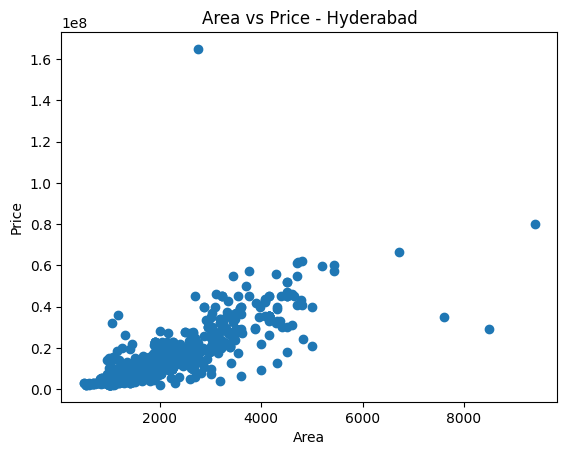

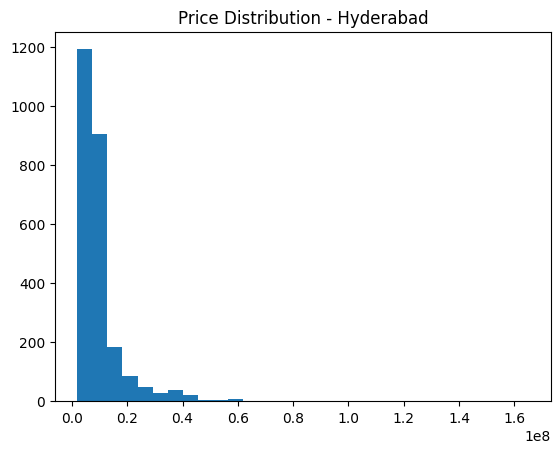

Simple LR R2: 0.6930308556461302
Multiple LR R2: 0.7600266265101058
PCA LR R2: -18941.018258777847
Lasso Best R2: -965.3198604856759
Ridge Best R2: -2.2237814188071114
SVR Best R2: -0.06280733946345922
Decision Tree Best R2: 0.6404133528539852
Random Forest Best R2: 0.7218834402910984


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

df = pd.read_csv("Hyderabad.csv")
df.head()

df.info()
df.describe()
df.isnull().sum()

plt.scatter(df['Area'], df['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price - Hyderabad")
plt.show()

plt.hist(df['Price'], bins=30)
plt.title("Price Distribution - Hyderabad")
plt.show()

X = df[['Area']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Simple LR R2:", r2_score(y_test, y_pred_lr))

df2 = pd.get_dummies(df, drop_first=True)

X = df2.drop('Price', axis=1)
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

print("Multiple LR R2:", r2_score(y_test, y_pred_mlr))

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train, y_train)
y_pred_pca = lr_pca.predict(X_test)

print("PCA LR R2:", r2_score(y_test, y_pred_pca))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=50000)
params = {'alpha': [0.1, 0.5, 1, 5, 10]}

grid_lasso = GridSearchCV(lasso, params, cv=5)
grid_lasso.fit(X_train_scaled, y_train)

ridge = Ridge(max_iter=50000)
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train_scaled, y_train)

print("Lasso Best R2:", grid_lasso.best_score_)
print("Ridge Best R2:", grid_ridge.best_score_)

svr = SVR()
rand_svr = RandomizedSearchCV(
    svr,
    {'C': [1, 5, 10, 50], 'epsilon': [0.01, 0.1, 1]},
    cv=5,
    n_iter=2
)
rand_svr.fit(X_train_scaled, y_train)

print("SVR Best R2:", rand_svr.best_score_)

dt = DecisionTreeRegressor()
grid_dt = GridSearchCV(dt, {'max_depth': [3, 5, 7, 10]}, cv=5)
grid_dt.fit(X_train, y_train)

print("Decision Tree Best R2:", grid_dt.best_score_)

rf = RandomForestRegressor()
rand_rf = RandomizedSearchCV(
    rf,
    {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]},
    cv=5,
    n_iter=2
)
rand_rf.fit(X_train, y_train)

print("Random Forest Best R2:", rand_rf.best_score_)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

df = pd.read_csv('BankChurners.csv')

df['Churn'] = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)

df = df.drop(['CLIENTNUM','Attrition_Flag'], axis=1)

X = df.drop('Churn', axis=1)
y = df['Churn']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(X[cat_cols])

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols])

import numpy as np
X_final = np.hstack((X_num, X_cat))

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("LOGISTIC REGRESSION:\n", classification_report(y_test, y_pred_lr))

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("NAIVE BAYES:\n", classification_report(y_test, y_pred_nb))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN:\n", classification_report(y_test, y_pred_knn))

svc = SVC(probability=True)
svc_params = {'C':[0.1,1,10], 'kernel':['linear','rbf']}
svc_grid = GridSearchCV(svc, svc_params, cv=3)
svc_grid.fit(X_train, y_train)
y_pred_svc = svc_grid.predict(X_test)
print("SVC (BEST):\n", classification_report(y_test, y_pred_svc))

dt = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth':[3,5,10,None]}
dt_grid = GridSearchCV(dt, dt_params, cv=3)
dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.predict(X_test)
print("DECISION TREE:\n", classification_report(y_test, y_pred_dt))

rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators':[50,100,200], 'max_depth':[5,10,20,None]}
rf_rand = RandomizedSearchCV(rf, rf_params, cv=3, n_iter=5)
rf_rand.fit(X_train, y_train)
y_pred_rf = rf_rand.predict(X_test)
print("RANDOM FOREST:\n", classification_report(y_test, y_pred_rf))

LOGISTIC REGRESSION:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00       325

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

NAIVE BAYES:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00       325

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00       325

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.0